In [7]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [9]:
 # Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


---

### Prepare the Data

In [15]:

# Create a StandardScaler instance
scaler.fit(df)

# Fit the scaler and transform the data
scaler.fit(df)
# Create a DataFrame with the scaled data
# Set the "coin_id" index from the original DataFrame
scaled_data = scaler.transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.index = df.index 

# Display the first five rows of the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [30]:
# Load the dataset
file_path =( "Resources/crypto_market_data.csv")
df_original = pd.read_csv(file_path, index_col="coin_id")

# Display the first five rows of the DataFrame
df_original.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


### Find the Best Value for k Using the Original Data.

In [33]:
# Create a list with the number of k values from 1 to 11
k_values = list(range(1, 12))

# Initialize an empty list to store the inertia values
inertia_values = []

# Compute the inertia for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary to plot the elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Plot the elbow curve using hvPlot
elbow_plot = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve (Original Scaled Data)',
    xlabel='Number of clusters (k)',
    ylabel='Inertia',
    xticks=k_values
)
elbow_plot


:Curve   [k]   (inertia)

In [34]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve = pd.DataFrame(elbow_data)

# Print the DataFrame to check the data
print(df_elbow_curve)


     k    inertia
0    1  82.000000
1    2  55.059288
2    3  44.076901
3    4  20.952553
4    5  15.073548
5    6  13.288119
6    7  11.828786
7    8   8.553593
8    9   7.336141
9   10   6.277035
10  11   4.372755


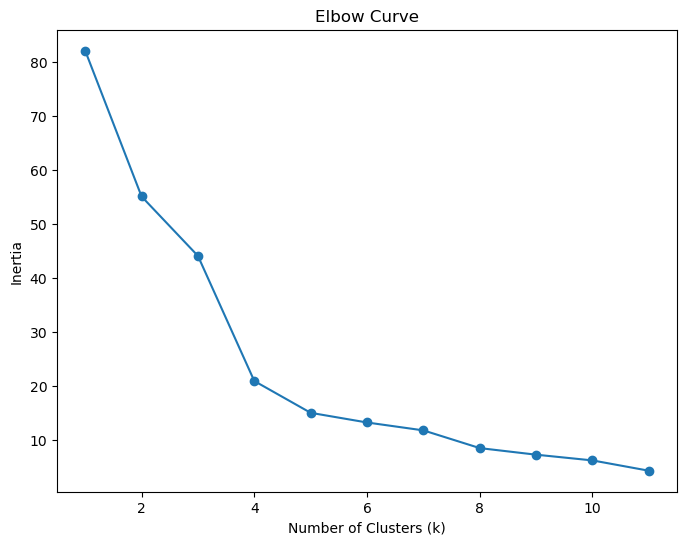

In [35]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(df_elbow_curve['k'], df_elbow_curve['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  Based on the elbow curve, the best value for k appears to be 4, where the inertia starts to decrease more slowly.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [36]:
# Initialize the K-Means model with the best value for k
k_best = 4
kmeans = KMeans(n_clusters=k_best, random_state=42)

# Fit the K-Means model using the original scaled DataFrame
kmeans.fit(df_scaled)

# Predict the clusters
clusters = kmeans.predict(df_scaled)

# Add the predicted clusters to the original DataFrame
df_clustered = df_original.copy()
df_clustered['Cluster'] = clusters

# Display the first five rows
df_clustered.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [37]:
# Create the scatter plot
cluster_plot = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (Original Scaled Data)'
)
cluster_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

### Optimize Clusters with Principal Component Analysis.

In [41]:
from sklearn.decomposition import PCA

# Initialize PCA model with n_components=2
pca = PCA(n_components=2)

# Fit the PCA model and transform the data
pca_data = pca.fit_transform(df_scaled)

# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance ratio
print("Explained variance ratio:", explained_variance)

# You can print or visualize pca_data if needed
print("PCA transformed data:", pca_data)


Explained variance ratio: [0.58482974 0.41517026]
PCA transformed data: [[-7.08324728e-01 -1.08443983e-02]
 [-7.91882474e-01  5.29622376e-01]
 [ 4.84059063e-01 -5.14852095e-01]
 [ 6.02237506e-01 -5.44587963e-01]
 [-2.25849563e+00  5.71287823e-01]
 [-1.56918679e+00  3.07891139e-01]
 [-1.82691513e+00  1.81079700e+00]
 [-1.13881757e+00  9.93818537e-01]
 [-2.91182149e-01  1.81584583e-01]
 [-1.82622508e-01 -4.52290799e-01]
 [ 9.07616739e-01 -1.37611710e+00]
 [ 4.94036788e-01 -5.42618222e-01]
 [ 5.42196257e-01 -7.62402830e-01]
 [-1.45333440e+00  1.08178827e+00]
 [-6.29550997e-02 -1.20962708e-01]
 [-3.93584349e-01  6.07955665e-01]
 [ 1.66916917e+00 -3.63563332e-01]
 [ 4.68636360e-01 -7.61313049e-02]
 [-1.12026670e+00  1.48227432e+00]
 [ 3.70580725e-01 -6.26342850e-01]
 [ 2.81115589e-02 -4.33348329e-01]
 [-6.91053069e-01 -3.79081795e-02]
 [ 6.19865871e-01 -6.93063096e-01]
 [ 3.60101566e-01 -2.86517907e-01]
 [ 7.54741212e-01 -4.46465410e-01]
 [ 4.56317401e-01 -5.43063140e-01]
 [-3.59638596e-01 

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total explained variance of the three principal components is 1.0, meaning they capture all the variance in the data.

In [45]:
# Create a DataFrame with the PCA data (since we used n_components=2, we should have only two columns)
df_pca = pd.DataFrame(
    pca_data,
    columns=['PC1', 'PC2'],  # Only 2 components
    index=df_scaled.index
)

# Display the first five rows of the PCA DataFrame
df_pca.head()

,PC1,PC2
0,-0.708325,-0.010844
1,-0.791882,0.529622
2,0.484059,-0.514852
3,0.602238,-0.544588
4,-2.258496,0.571288


---

### Find the Best Value for k Using the PCA Data

In [46]:
# Compute the inertia for each k value using the PCA data
inertia_pca = []

for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(df_pca)
    inertia_pca.append(kmeans_pca.inertia_)

# Create a DataFrame for the elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_pca}
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Plot the elbow curve
elbow_plot_pca = df_elbow_pca.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve (PCA Data)',
    xlabel='Number of clusters (k)',
    ylabel='Inertia',
    xticks=k_values
)
elbow_plot_pca


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k using the PCA data is also 4, which is consistent with the original data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Using fewer features with PCA simplifies the clustering process without losing significant information, as the total explained variance remains high.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [49]:
# Initialize the K-Means model with the best value for k
kmeans_pca = KMeans(n_clusters=k_best, random_state=42)

# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)

# Predict the clusters
clusters_pca = kmeans_pca.predict(df_pca)

# Add the predicted clusters to the PCA DataFrame
df_pca_clustered = df_pca.copy()
df_pca_clustered['Cluster'] = clusters_pca

# Display the first five rows
df_pca_clustered.head()


,PC1,PC2,Cluster
0,-0.708325,-0.010844,0
1,-0.791882,0.529622,0
2,0.484059,-0.514852,1
3,0.602238,-0.544588,1
4,-2.258496,0.571288,2


In [50]:
# Create the scatter plot
cluster_plot_pca = df_pca_clustered.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (PCA Data)'
)
cluster_plot_pca


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [51]:
# Create composite plot of elbow curves
(elbow_plot + elbow_plot_pca).cols(1)


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [52]:
# Create composite plot of cluster visualizations
(cluster_plot + cluster_plot_pca).cols(1)


:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster data with K-Means can have several impacts:

Simplification of the Clustering Process: Reducing the number of features simplifies the clustering process by focusing only on the most important dimensions of the data. This can lead to clearer, more interpretable clusters since the algorithm no longer has to account for potentially noisy or irrelevant features.

Risk of Losing Information: By using fewer features, some important information may be excluded, which can reduce the accuracy or meaningfulness of the clusters. If key characteristics of the data are omitted, the clusters may not fully capture the underlying patterns.

Improved Visualization: Fewer features make it easier to visualize clusters, especially when reducing the data to 2 or 3 dimensions. This allows for better interpretation and understanding of the clusters’ structure and separation.

Faster Computation: Reducing the number of features typically decreases the computational complexity, making the clustering process faster, particularly with large datasets.

Risk of Over-Simplification: In some cases, using too few features can oversimplify the model, causing it to miss subtle distinctions between data points, leading to less distinct or meaningful clusters.